# DataScience Project -- Explore Baseball Statistics
#### By Imama Mansoor

In [1]:
# Importing all the necessary packages of Python

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Making connection to the Baseball database for its exploration

connection = sqlite3.connect("Baseball-SQL.db")
cursor = connection.cursor()

In [2]:
# Making the Dataframe based on the data passed as a result of the SQL query

dfActive_Play50g = pd.read_sql_query("""SELECT Batting.*, People.nameFirst, People.nameLast, People.nameGiven, People.birthYear,
People.birthMonth ,People.birthDay, People.birthCountry, People.birthState, People.birthCity, People.weight, People.bats, 
People.throws 
FROM Appearances JOIN People 
ON (Appearances.playerID = People.playerID) 
JOIN Batting 
ON (Batting.playerID = People.playerID) 
WHERE ((2021 - People.birthYear) <= 45 ) and (People.deathYear is NULL) and (Appearances.G_all >= 50)""", connection)

In [3]:
# Checking the shape of the Dataframe to get the idea about number of rows and columns

print(dfActive_Play50g.shape)

(77800, 34)


In [4]:
print(dfActive_Play50g)

        playerID  yearID  stint teamID lgID    G   AB   R   H  2B  ...  \
0      aardsda01    2004      1    SFN   NL   11    0   0   0   0  ...   
1      aardsda01    2006      1    CHN   NL   45    2   0   0   0  ...   
2      aardsda01    2007      1    CHA   AL   25    0   0   0   0  ...   
3      aardsda01    2008      1    BOS   AL   47    1   0   0   0  ...   
4      aardsda01    2009      1    SEA   AL   73    0   0   0   0  ...   
...          ...     ...    ...    ...  ...  ...  ...  ..  ..  ..  ...   
77795  zuninmi01    2016      1    SEA   AL   55  164  16  34   7  ...   
77796  zuninmi01    2017      1    SEA   AL  124  387  52  97  25  ...   
77797  zuninmi01    2018      1    SEA   AL  113  373  37  75  18  ...   
77798  zuninmi01    2019      1    TBA   AL   90  266  30  44  10  ...   
77799  zuninmi01    2020      1    TBA   AL   28   75   8  11   4  ...   

             nameGiven  birthYear  birthMonth  birthDay  birthCountry  \
0          David Allan       1981     

In [5]:
# Checking the name of the imported columns to apply conditions for data manipulation

print(dfActive_Play50g.columns)

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP', 'nameFirst', 'nameLast', 'nameGiven', 'birthYear',
       'birthMonth', 'birthDay', 'birthCountry', 'birthState', 'birthCity',
       'weight', 'bats', 'throws'],
      dtype='object')


In [6]:
# Calucalted Column Age

dfActive_Play50g['Age'] = 2021 - dfActive_Play50g['birthYear'] 

In [7]:
dfActive_Play50g['Age']

0        40
1        40
2        40
3        40
4        40
         ..
77795    30
77796    30
77797    30
77798    30
77799    30
Name: Age, Length: 77800, dtype: int64

In [8]:
# Checking Age (column) is being added in Dataframe

dfActive_Play50g.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP', 'nameFirst', 'nameLast', 'nameGiven', 'birthYear',
       'birthMonth', 'birthDay', 'birthCountry', 'birthState', 'birthCity',
       'weight', 'bats', 'throws', 'Age'],
      dtype='object')

In [9]:
print(dfActive_Play50g)

        playerID  yearID  stint teamID lgID    G   AB   R   H  2B  ...  \
0      aardsda01    2004      1    SFN   NL   11    0   0   0   0  ...   
1      aardsda01    2006      1    CHN   NL   45    2   0   0   0  ...   
2      aardsda01    2007      1    CHA   AL   25    0   0   0   0  ...   
3      aardsda01    2008      1    BOS   AL   47    1   0   0   0  ...   
4      aardsda01    2009      1    SEA   AL   73    0   0   0   0  ...   
...          ...     ...    ...    ...  ...  ...  ...  ..  ..  ..  ...   
77795  zuninmi01    2016      1    SEA   AL   55  164  16  34   7  ...   
77796  zuninmi01    2017      1    SEA   AL  124  387  52  97  25  ...   
77797  zuninmi01    2018      1    SEA   AL  113  373  37  75  18  ...   
77798  zuninmi01    2019      1    TBA   AL   90  266  30  44  10  ...   
77799  zuninmi01    2020      1    TBA   AL   28   75   8  11   4  ...   

       birthYear  birthMonth  birthDay  birthCountry  birthState   birthCity  \
0           1981          12   

In [10]:
# Calculated Column Player Name, got by the concatenation of First Name and Last Name

dfActive_Play50g['playerName'] = dfActive_Play50g['nameFirst'] + str(' ') + dfActive_Play50g['nameLast']

In [11]:
dfActive_Play50g['playerName']

0        David Aardsma
1        David Aardsma
2        David Aardsma
3        David Aardsma
4        David Aardsma
             ...      
77795      Mike Zunino
77796      Mike Zunino
77797      Mike Zunino
77798      Mike Zunino
77799      Mike Zunino
Name: playerName, Length: 77800, dtype: object

In [12]:
dfActive_Play50g.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP', 'nameFirst', 'nameLast', 'nameGiven', 'birthYear',
       'birthMonth', 'birthDay', 'birthCountry', 'birthState', 'birthCity',
       'weight', 'bats', 'throws', 'Age', 'playerName'],
      dtype='object')

In [13]:
# Dropping all the columns related to Birth date and Name

dfActive_Play50g.drop(['birthYear', 'birthMonth', 'birthDay', 'birthCountry', 'birthState', 'birthCity',
                       'nameFirst', 'nameLast', 'nameGiven'], axis='columns', inplace=True)

In [14]:
dfActive_Play50g.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP', 'weight', 'bats', 'throws', 'Age', 'playerName'],
      dtype='object')

In [15]:
# Removing duplicates from the Dataframe as to avoid redundant rows

dfActive_Play50g.drop_duplicates(inplace=True)
print(dfActive_Play50g)

        playerID  yearID  stint teamID lgID    G   AB   R   H  2B  ...  IBB  \
0      aardsda01    2004      1    SFN   NL   11    0   0   0   0  ...    0   
1      aardsda01    2006      1    CHN   NL   45    2   0   0   0  ...    0   
2      aardsda01    2007      1    CHA   AL   25    0   0   0   0  ...    0   
3      aardsda01    2008      1    BOS   AL   47    1   0   0   0  ...    0   
4      aardsda01    2009      1    SEA   AL   73    0   0   0   0  ...    0   
...          ...     ...    ...    ...  ...  ...  ...  ..  ..  ..  ...  ...   
77747  zuninmi01    2016      1    SEA   AL   55  164  16  34   7  ...    0   
77748  zuninmi01    2017      1    SEA   AL  124  387  52  97  25  ...    0   
77749  zuninmi01    2018      1    SEA   AL  113  373  37  75  18  ...    0   
77750  zuninmi01    2019      1    TBA   AL   90  266  30  44  10  ...    0   
77751  zuninmi01    2020      1    TBA   AL   28   75   8  11   4  ...    0   

       HBP  SH  SF  GIDP  weight  bats throws Age  

In [16]:
# Dropping rows with all missing values

dfActive_Play50g.dropna(axis=0, how='all', inplace=True)

In [17]:
dfActive_Play50g.shape

(13956, 27)

In [18]:
# Checking the years from YearID 

dfActive_Play50g['yearID'].unique()

array([2004, 2006, 2007, 2008, 2009, 2010, 2012, 2013, 2015, 2011, 2014,
       2016, 2017, 2019, 2001, 2002, 2003, 2005, 2018, 2020, 1998, 1999,
       2000, 1997, 1996], dtype=int64)

In [19]:
# Which active player had the most runs batted in 2015-2018?
# Making a Dataframe which include years between 2015 and 2018

dfActive_2015_2018 = dfActive_Play50g[np.logical_and(dfActive_Play50g['yearID'] >= 2015, dfActive_Play50g['yearID'] <= 2018)]

In [20]:
dfActive_2015_2018['yearID'].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [21]:
# Condition to get the Player Name with the maximum runs (RBI)

PlayerWithMostRuns = dfActive_2015_2018.loc[dfActive_2015_2018['RBI'] == dfActive_2015_2018['RBI'].max()]

In [22]:
# Fetching the particular player name

print(PlayerWithMostRuns)

       playerID  yearID  stint teamID lgID    G   AB    R    H  2B  ...  IBB  \
1699  arenano01    2016      1    COL   NL  160  618  116  182  35  ...   10   

      HBP  SH  SF  GIDP  weight  bats throws Age     playerName  
1699    2   0   8    17     215     R      R  30  Nolan Arenado  

[1 rows x 27 columns]


In [23]:
# Showing the Player name who scored the most runs batted in -- RBI during 2015-2018

print(PlayerWithMostRuns['playerName'])

1699    Nolan Arenado
Name: playerName, dtype: object


In [24]:
# Making the Dataframe which contains only the data records for 2016

dfActive_2016 = dfActive_Play50g[dfActive_Play50g['yearID'] == 2016]

In [25]:
print(dfActive_2016)

        playerID  yearID  stint teamID lgID    G   AB   R    H  2B  ...  IBB  \
24      abadfe01    2016      1    MIN   AL   39    1   0    0   0  ...    0   
25      abadfe01    2016      2    BOS   AL   18    0   0    0   0  ...    0   
53     abreujo02    2016      1    CHA   AL  159  624  67  183  32  ...    7   
148    ackledu01    2016      1    NYA   AL   28   61   6    9   0  ...    0   
185    adamecr01    2016      1    COL   NL  121  225  25   49   7  ...    0   
...          ...     ...    ...    ...  ...  ...  ...  ..  ...  ..  ...  ...   
77227  zieglbr01    2016      1    ARI   NL   36    0   0    0   0  ...    0   
77228  zieglbr01    2016      2    BOS   AL   33    0   0    0   0  ...    0   
77345  zimmery01    2016      1    WAS   NL  115  427  60   93  18  ...    1   
77555  zobribe01    2016      1    CHN   NL  147  523  94  142  31  ...    6   
77747  zuninmi01    2016      1    SEA   AL   55  164  16   34   7  ...    0   

       HBP  SH  SF  GIDP  weight  bats 

In [26]:
# Fetching Albert Pujols data

Albert_Pujols_GIDP2016 = dfActive_2016.loc[dfActive_2016['playerName'] == 'Albert Pujols']

In [27]:
# Showing the GIDP of Albert Pujols

print(Albert_Pujols_GIDP2016['GIDP'])

56618    24
Name: GIDP, dtype: int64


In [28]:
# Creating a histogram for Triples(3B) per year
# Only those rows are extracted whose 3B value is greater than 0

dfTriples = dfActive_Play50g.loc[ dfActive_Play50g['3B'] > 0 ]

In [29]:
# Taking only necessary columns

dfTriples = dfTriples[['yearID', '3B']]

In [30]:
print(dfTriples)

       yearID  3B
38       2006   2
41       2001   1
42       2002   4
51       2014   2
52       2015   3
...       ...  ..
77555    2016   3
77556    2017   3
77557    2018   3
77745    2014   2
77750    2019   1

[4961 rows x 2 columns]


In [31]:
# Grouping by year, it will generate sum of 3B for each year

dfTriples_groupedYear = dfTriples.groupby(['yearID']).sum()

In [32]:
print(dfTriples_groupedYear)
print(dfTriples_groupedYear.shape)

         3B
yearID     
1996      4
1997     12
1998     31
1999     65
2000    106
2001    190
2002    265
2003    407
2004    469
2005    531
2006    621
2007    698
2008    721
2009    809
2010    788
2011    833
2012    883
2013    738
2014    830
2015    919
2016    844
2017    772
2018    834
2019    749
2020    206
(25, 1)


In [33]:
# Dataframe for which histogram of 3B per year can be calculated

dfHistogram = dfTriples_groupedYear.loc[dfTriples_groupedYear.index.repeat(dfTriples_groupedYear['3B'])]
print(dfHistogram)

         3B
yearID     
1996      4
1996      4
1996      4
1996      4
1997     12
...     ...
2020    206
2020    206
2020    206
2020    206
2020    206

[13325 rows x 1 columns]


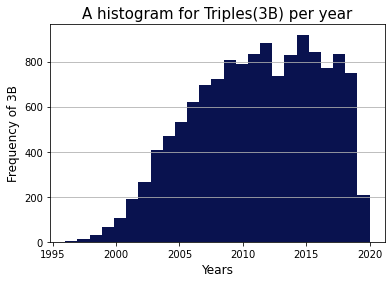

In [34]:
# Generating a histogram for Triples(3B) per year

plt.hist(dfHistogram.index.values, bins=25, color='#09124F')
plt.grid(axis='y')
plt.title('A histogram for Triples(3B) per year',fontsize=15)
plt.xlabel('Years',fontsize=12)
plt.ylabel('Frequency of 3B',fontsize=12)
plt.show()

In [35]:
# Loop for creating histogram for Triples (3B) per year
# Just to show the distribution of triples(3B) in each year sepearately
# Creating a Dataframes based on YearIDs

dfYears = dfActive_Play50g['yearID'].sort_values().unique()

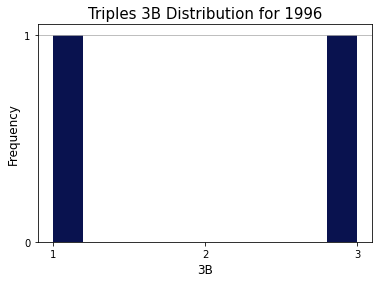

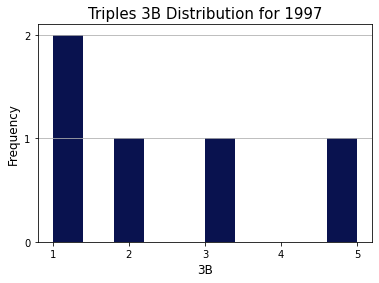

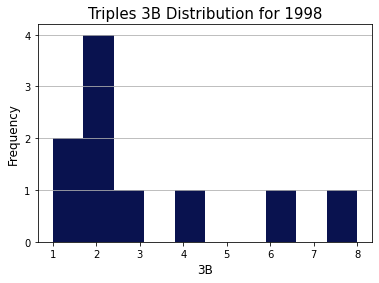

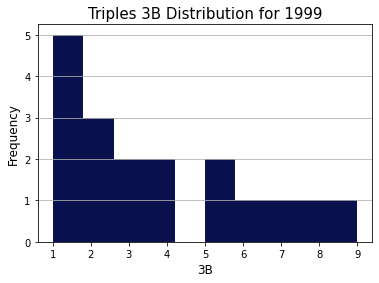

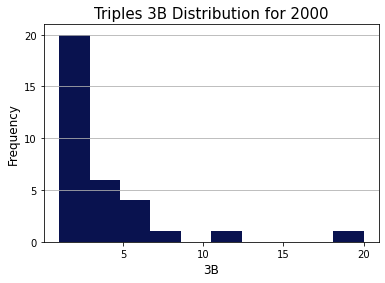

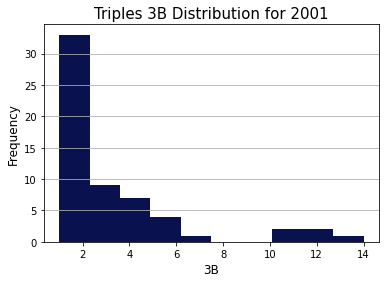

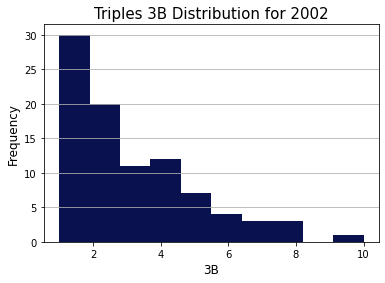

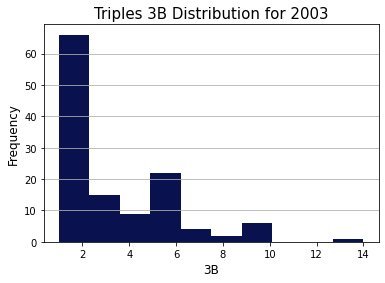

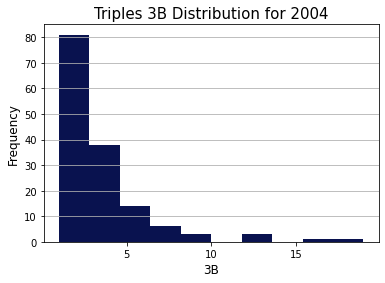

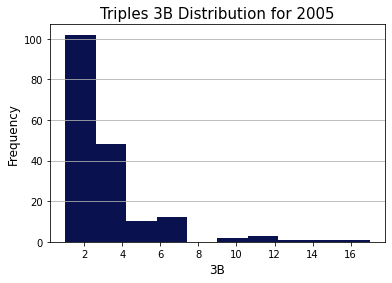

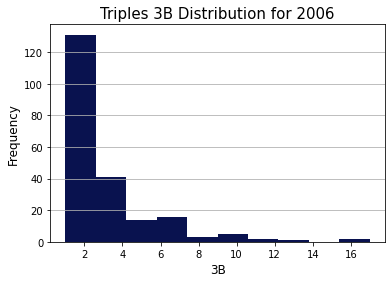

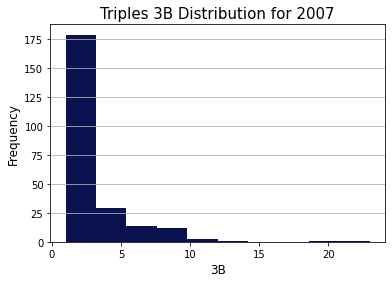

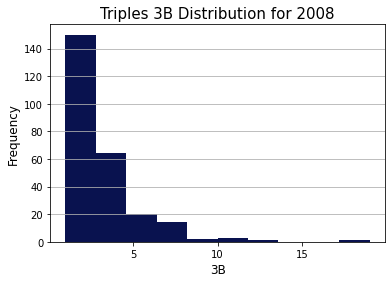

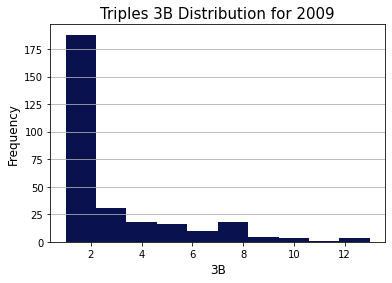

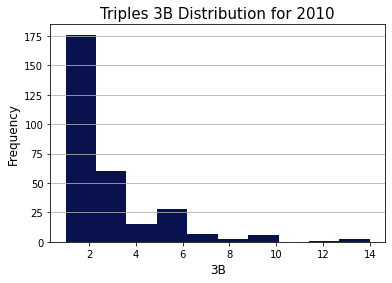

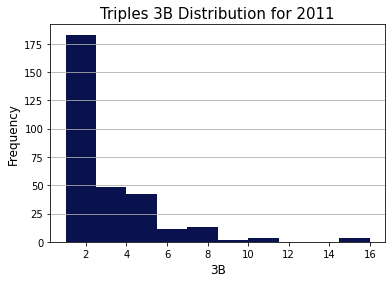

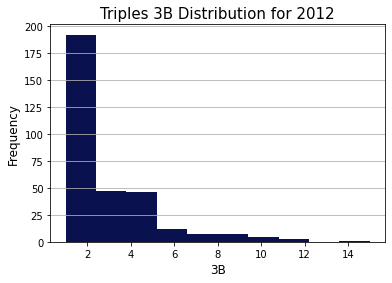

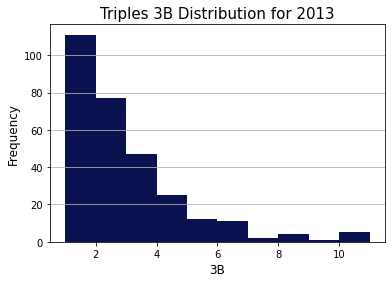

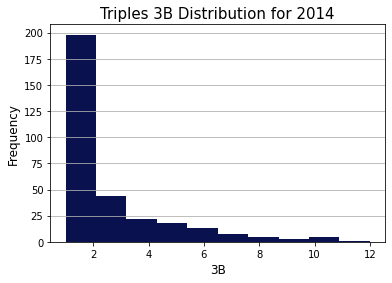

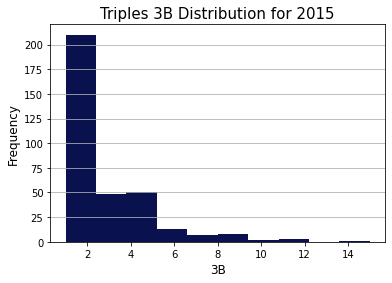

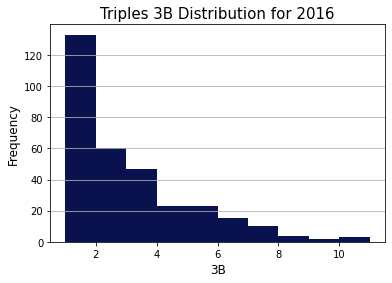

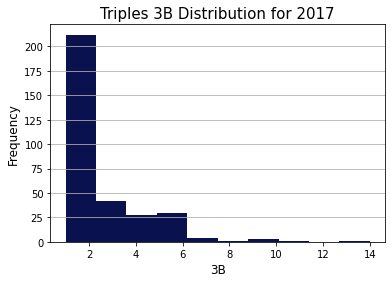

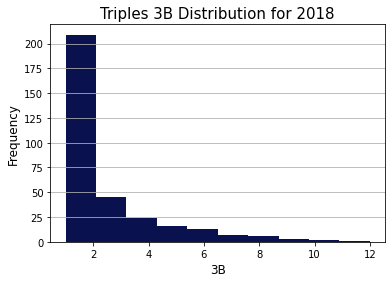

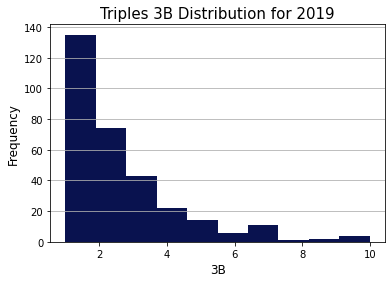

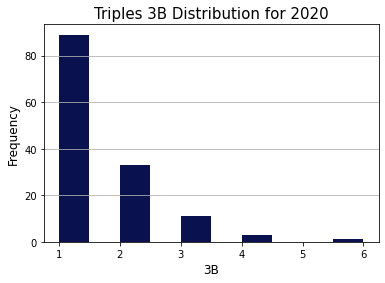

In [36]:
for year in dfYears:
    dfHisto_3B = dfActive_Play50g.loc[ dfActive_Play50g['3B'] > 0 ]
    dfHisto_3B.loc[dfHisto_3B['yearID'] == year, '3B'].plot(kind='hist', color='#09124F')
    plt.locator_params(axis="both", integer=True, tight=True)
    plt.grid(axis='y')
    plt.title('Triples 3B Distribution for' + str(' ') + str(year),fontsize=15)
    plt.xlabel('3B',fontsize=12)
    plt.ylabel('Frequency',fontsize=12)
    plt.show()


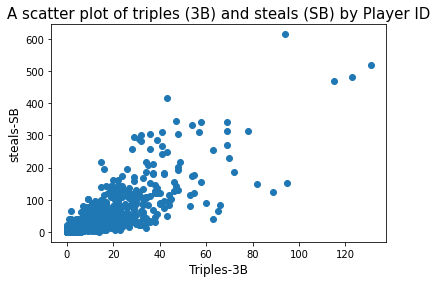

In [37]:
# Creating a scatter plot relating triples (3B) and steals (SB)

dfScatter = dfActive_Play50g.groupby(['playerID']).sum()
plt.scatter( dfScatter['3B'], dfScatter['SB'])
plt.title('A scatter plot of triples (3B) and steals (SB) by Player ID',fontsize=15)
plt.xlabel('Triples-3B',fontsize=12)
plt.ylabel('steals-SB',fontsize=12)
plt.show()

# As showing in the scatter plot, there is a linear relationship between 3B and SB

In [38]:
# Creating a dataframe for awards to get the answer that which player get how many awards?

dfAwards = pd.read_sql_query("""SELECT P.playerID, P.nameGiven, AP.awardID, count(AP.awardID) AS CountOfAwards 
FROM AwardsPlayers AS AP JOIN People AS P 
ON AP.playerID = P.playerID 
GROUP by AP.awardID 
ORDER By CountOfAwards DESC""", connection)

In [39]:
# Shwoing the result in a tabular form about the Number of Awards each player got and player with maximum awards

from tabulate import tabulate
print(tabulate(dfAwards, headers=['Index', 'PlayerID', 'PlayerName', 'AwardID', 'CountOfAwards'], tablefmt="grid"))

+---------+------------+------------------+-------------------------------------+-----------------+
|   Index | PlayerID   | PlayerName       | AwardID                             |   CountOfAwards |
+=========+============+==================+=====================================+=================+
|       0 | chaseha01  | Harold Homer     | Baseball Magazine All-Star          |            1520 |
+---------+------------+------------------+-------------------------------------+-----------------+
|       1 | bottoji01  | James Leroy      | TSN All-Star                        |            1391 |
+---------+------------+------------------+-------------------------------------+-----------------+
|       2 | hodgegi01  | Gilbert Raymond  | Gold Glove                          |            1091 |
+---------+------------+------------------+-------------------------------------+-----------------+
|       3 | coopece01  | Cecil Celester   | Silver Slugger                      |             685 |


In [40]:
# Creating a dataframe to answer about the shortest baseball player

dfPeople = pd.read_sql_query("""SELECT playerID, nameFirst, nameLast, nameGiven, height 
FROM People 
WHERE height is not NULL 
ORDER by height""", connection)

In [41]:
ShortestPlayer = dfPeople.iloc[0]

In [42]:
# Showing the name of the shortest player

print(ShortestPlayer)

playerID       gaedeed01
nameFirst          Eddie
nameLast          Gaedel
nameGiven    Edward Carl
height                43
Name: 0, dtype: object
